In [ ]:
#Taller: Análisis Exploratorio de Datos (EDA) con Dataset de Cafe

#Objetivo: En este taller, realizaremos un análisis exploratorio de datos (EDA) usando un dataset de Cafe. Aplicaremos lo que hemos aprendido sobre la manipulación de datos y visualización para obtener insights importantes del conjunto de datos.


In [1]:
# 1. Carga del Dataset:
# Carga el dataset proporcionado sobre cafe en un DataFrame de pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/arabica_coffee_full_table.csv')
print(dataset)

     coffee_id Country_of_Origin                      Farm_Name  \
0      #647123         Guatemala           san francisco cotzal   
1      #927000         Guatemala              San jose del lago   
2      #902618         Guatemala                  varias fincas   
3      #781706         Guatemala              San jose del lago   
4      #237025         Guatemala                 Finca Alta Luz   
...        ...               ...                            ...   
1504   #241548          Ethiopia                  Gelana Geisha   
1505   #510790          Ethiopia  Bisrat Melaku Washing Station   
1506   #611011          Ethiopia   Uraga Bisrat washing station   
1507   #917098          Ethiopia                    Eshetu farm   
1508   #106719              Laos      Nongluang Bolaven Plateau   

                                 Lot_Number  \
0                                 11/441/50   
1                                  11/15/95   
2                                  11/15/51   
3      

In [2]:
# Crea una máscara booleana para las filas donde el país es 'Colombia'.
mask = dataset['Country_of_Origin'] == 'Colombia'

# Crea un nuevo DataFrame usando la máscara.
colombia_lista = dataset[mask]

# Muestra el nuevo DataFrame.
print(colombia_lista)
# 2. Revisión General de los Datos:
print(colombia_lista.info())
print("///////////////////////")
# Imprime las primeras 5 filas del dataset.
print(colombia_lista.head())
# Usa .info() y .describe() para entender mejor la estructura y las estadísticas básicas.
print("///////////////////////")
print(colombia_lista.describe())


     coffee_id Country_of_Origin         Farm_Name  \
20     #858598          Colombia             N / A   
21     #329719          Colombia      La fortaleza   
22     #449544          Colombia          EL PRADO   
23     #882894          Colombia             Huila   
25     #274853          Colombia               NaN   
...        ...               ...               ...   
1494   #138975          Colombia      Buenos Aires   
1496   #367114          Colombia       El Diamante   
1497   #270359          Colombia   Finca Santuario   
1498   #261473          Colombia  Finca El Paraiso   
1501   #689252          Colombia      La Argentina   

                        Lot_Number                       Mill    ICO_Number  \
20                    3-0068-00886         Trilladora Popayán  3-0068-00886   
21    3-0104-00202 Popayán Supremo         Trilladora Pubenza  3-0104-00202   
22                       3-59-0654                      NEIVA     3-59-0654   
23                    3-0960-00750 

In [3]:
# 3. Búsqueda y Eliminación de Duplicados:

duplicados = colombia_lista.duplicated().sum()
print("Hay", duplicados, "registros duplicados")

# Verifica si hay filas duplicadas en el dataset utilizando el método .duplicated().
# Si se encuentran duplicados, elimínalos con .drop_duplicates() y verifica cuántos duplicados fueron eliminados.

Hay 0 registros duplicados


In [4]:
# 4. Identificación de Valores Nulos:
valores_faltantes = colombia_lista.isnull().sum()
print(valores_faltantes)
# Identifica qué columnas tienen valores nulos y cuántos valores nulos hay en cada columna.

coffee_id                  0
Country_of_Origin          0
Farm_Name                169
Lot_Number               151
Mill                      61
ICO_Number                14
Company                   29
Altitude                  34
Region                    10
Producer                  91
Number_of_Bags             0
Bag_Weight                 0
In_Country_Partner         0
Harvest_Year               5
Grading_Date               0
Owner                      1
Variety                   45
Status                   183
Processing_Method         37
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean_Cup                  0
Sweetness                  0
Overall                    0
Defects                  183
Total_Cup_Points           0
Moisture                   0
Color                     49
Category_One_Defects       0
Category_Two_D

20      7.58
21      7.58
22      7.33
23      7.75
25      7.67
        ... 
1494    7.50
1496    8.00
1497    8.25
1498    8.58
1501    7.58
Name: Overall, Length: 202, dtype: float64


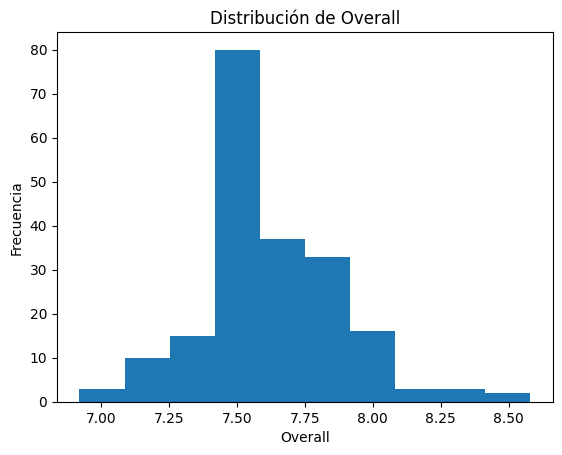

In [6]:
# 5. Visualización de Variables:
print(colombia_lista['Overall'])
# Crea un histograma que muestre la distribución de la Muestra la distribución de la variable overall (Calificación General) para los cafés de Colombia.
plt.hist(colombia_lista['Overall'], bins=10)
plt.xlabel('Overall')
plt.ylabel('Frecuencia')
plt.title('Distribución de Overall')
plt.show()


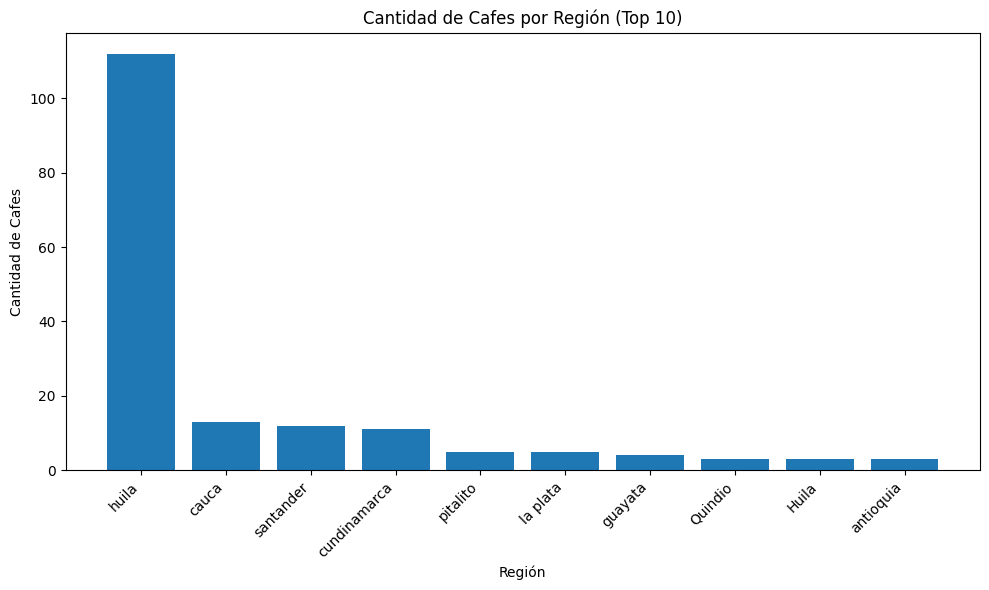

In [14]:

# Realiza un gráfico de barras para visualizar la cantidad de cafe que hay por regiones

region_counts = colombia_lista['Region'].value_counts()

# Filtrar por top 10 de regiones
top_n = 10
top_regions = region_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_regions.index, top_regions.values)
plt.xlabel('Región')
plt.ylabel('Cantidad de Cafes')
plt.title('Cantidad de Cafes por Región (Top {})'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


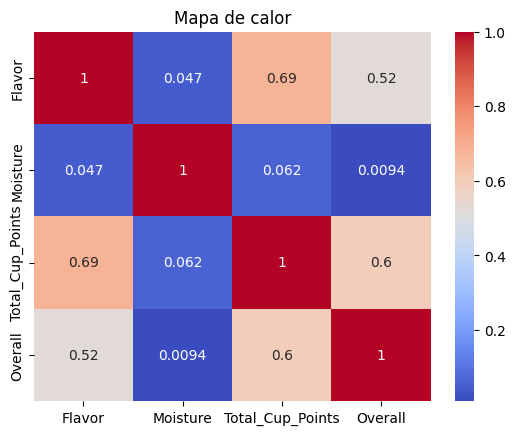

In [15]:
# 6. Análisis de Correlaciones:

# Calcula y muestra la correlación entre sabor, humedad, puntos totales y overall.
#mapa de calor
# Usa un mapa de calor para visualizar las correlaciones.
mapa_calor = colombia_lista[['Flavor', 'Moisture', 'Total_Cup_Points', 'Overall']]
matrix = mapa_calor.corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor')
plt.show()


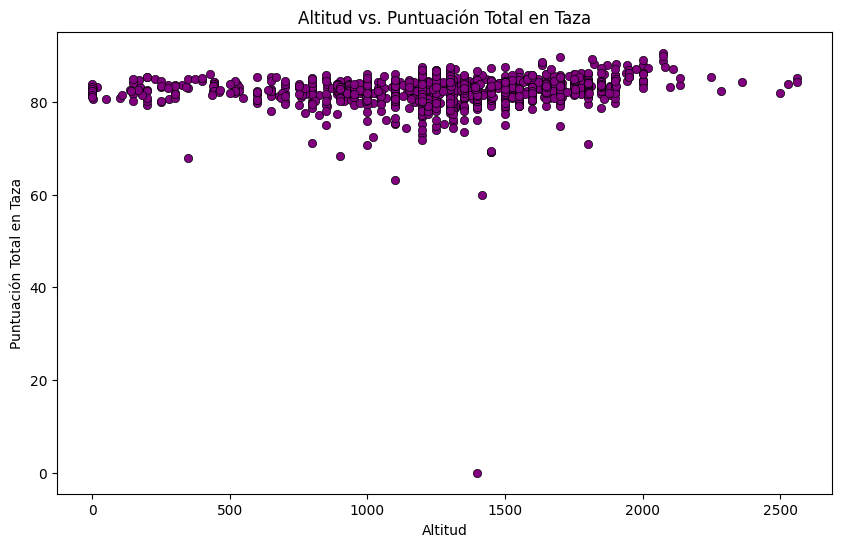

In [16]:
# 7. Gráficos de Dispersión:
# Crea un gráfico de dispersión para analizar la relación entre budget y gross.
# Haz un gráfico de dispersión entre imdb_score y budget.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Altitude'], y=dataset['Total_Cup_Points'], color='purple', edgecolor='black')
plt.title('Altitud vs. Puntuación Total en Taza')
plt.xlabel('Altitud')
plt.ylabel('Puntuación Total en Taza')
plt.show()

In [ ]:
#Conclusiones
#1. Al analizar las gráficas de la relación entre altitud y puntuación del café, se observa que las calificaciones más altas se concentran en una zona intermedia de altitud, aproximadamente entre 900 y 1800 metros sobre el nivel del mar. Esto sugiere que estas alturas ofrecen condiciones óptimas para el cultivo, probablemente debido a factores como el clima, la radiación solar y los ciclos de humedad, que favorecen el desarrollo de los atributos sensoriales más valorados en la evaluación del café.
#2. La región de Huila es, con diferencia, la mayor productora o proveedora de muestras de café en comparación con otras regiones del país. Esto sugiere que Huila tiene una posición predominante en la producción de café colombiano, probablemente debido a factores como su clima favorable, la experiencia de los caficultores locales, y las condiciones ideales de altitud.
#3. A partir del histograma que muestra la distribución de la variable "Overall", se pueden observar algunas conclusiones: 1. Distribución centralizada: La mayoría de los valores se encuentran alrededor de 7.5 en la escala de "Overall", con una alta concentración de frecuencias en este punto.

Entregables Misión 1
1. Código completo del EDA en un archivo Jupyter Notebook. Incluir el dataset que quedó como resultado de la limpieza.
2. Gráficas generadas (histogramas, gráficos de barras, gráficos de dispersión, mapa de calor).
3. Un resumen de las conclusiones obtenidas, basado en las visualizaciones y análisis de correlaciones realizados.